In [51]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


In [2]:
# dataset ornatib olamiz
data = pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
# data bilan tanishib chiqamiz
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df = data.drop_duplicates()

In [5]:
# Checking null values
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


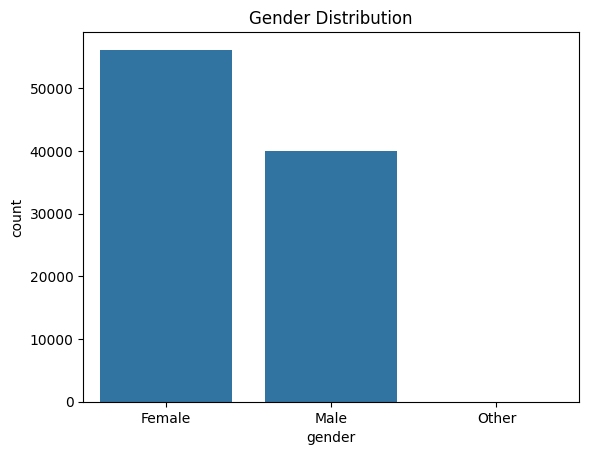

In [10]:
# Bar plot for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

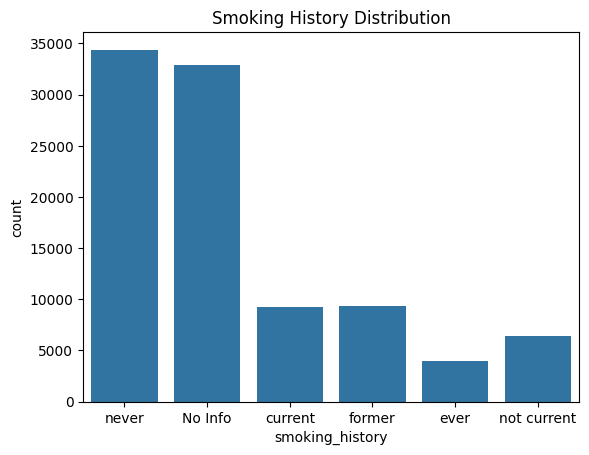

In [11]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

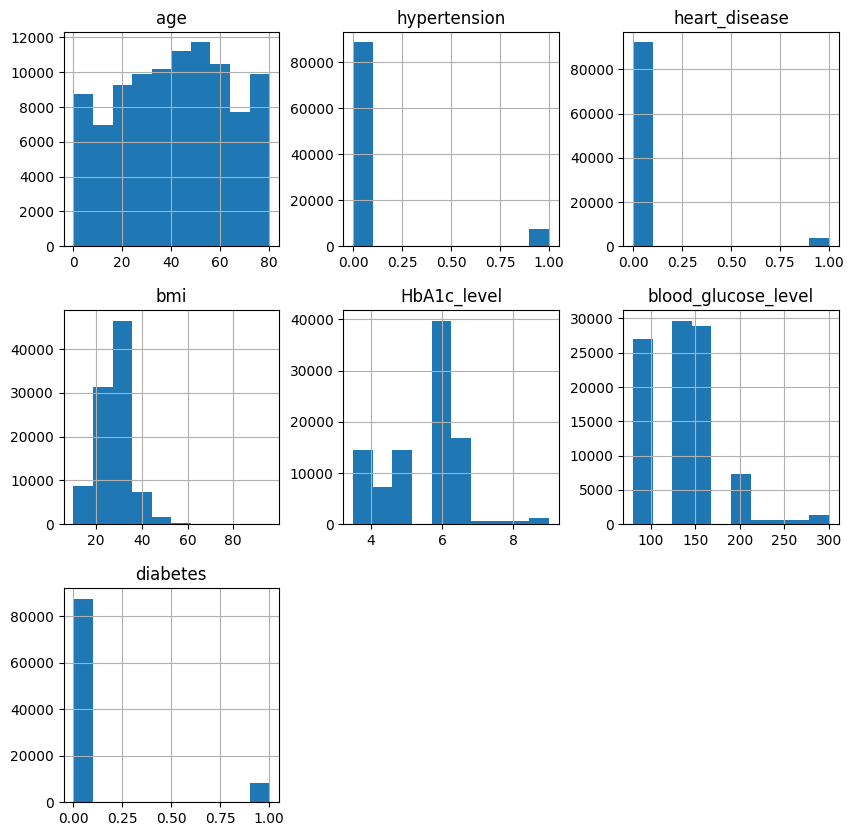

In [12]:
df.hist(figsize = (10,10))
plt.show()

In [14]:
# data bilan tanishib chiqamiz
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [17]:
# categorical qiymatlarni numerical qiymatga otkazib olamiz

categorical_col=data.select_dtypes(include=['object', 'category']).columns
label_encoder=LabelEncoder()
for col in categorical_col:
    data[col]=label_encoder.fit_transform(data[col])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  96146 non-null   float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  96146 non-null   float64
 6   HbA1c_level          96146 non-null   float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


In [31]:
# Option 1: Fill missing values with a default value (e.g., 0 or the column's mean)
data['age'] = data['age'].fillna(0).astype(int)
data['HbA1c_level'] = data['HbA1c_level'].fillna(0).astype(int)
data['bmi'] = data['bmi'].fillna(0).astype(int)

# Option 2: Drop rows with missing values in these columns
df = df.dropna(subset=['age', 'HbA1c_level', 'bmi'])


In [32]:
# Convert the specified columns to integers
data['age'] = data['age'].astype(int)
data['HbA1c_level'] =data['HbA1c_level'].astype(int)
data['bmi'] = data['bmi'].astype(int)

# Verify the changes
data[['age', 'HbA1c_level', 'bmi']].dtypes


age            int64
HbA1c_level    int64
bmi            int64
dtype: object

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   gender               100000 non-null  int64
 1   age                  100000 non-null  int64
 2   hypertension         100000 non-null  int64
 3   heart_disease        100000 non-null  int64
 4   smoking_history      100000 non-null  int64
 5   bmi                  100000 non-null  int64
 6   HbA1c_level          100000 non-null  int64
 7   blood_glucose_level  100000 non-null  int64
 8   diabetes             100000 non-null  int64
dtypes: int64(9)
memory usage: 6.9 MB


In [37]:
#x va y ni aniqlash
x=data.drop('diabetes',axis=1)

In [44]:
y=data['diabetes']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [48]:
# Bagging
bagging_model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(x_train, y_train)
bagging_pred = bagging_model.predict(x_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)

In [49]:
bagging_model

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [52]:
# Boosting (AdaBoost)
boosting_model = AdaBoostClassifier(n_estimators=100, random_state=42)
boosting_model.fit(x_train, y_train)
boosting_pred = boosting_model.predict(x_test)
boosting_accuracy = accuracy_score(y_test, boosting_pred)

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [55]:
# 1. Single Model - Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

Decision Tree Accuracy: 0.9485


In [56]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Bagging - Bagging Classifier with Decision Tree as base estimator
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(x_train, y_train)
y_pred_bagging = bagging_model.predict(x_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")

Bagging Classifier Accuracy: 0.9612


In [58]:
# 3. Boosting - Gradient Boosting Classifier
boosting_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
boosting_model.fit(x_train, y_train)
y_pred_boosting = boosting_model.predict(x_test)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print(f"Boosting Classifier (Gradient Boosting) Accuracy: {accuracy_boosting:.4f}")

Boosting Classifier (Gradient Boosting) Accuracy: 0.9673


In [60]:
# Optional: Random Forest for comparison
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest Accuracy: 0.9626


In [61]:
# Create a comparison table for results
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Bagging (Decision Tree)', 'Boosting (Gradient Boosting)', 'Random Forest'],
    'Accuracy': [accuracy_dt, accuracy_bagging, accuracy_boosting, accuracy_rf]
}).sort_values(by='Accuracy', ascending=False)

print("\nModel Comparison:\n")
print(results)


Model Comparison:

                          Model  Accuracy
2  Boosting (Gradient Boosting)  0.967267
3                 Random Forest  0.962600
1       Bagging (Decision Tree)  0.961233
0                 Decision Tree  0.948467


C:\Users\user\AppData\Local\Temp\ipykernel_12504\4160825611.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results, palette='viridis')


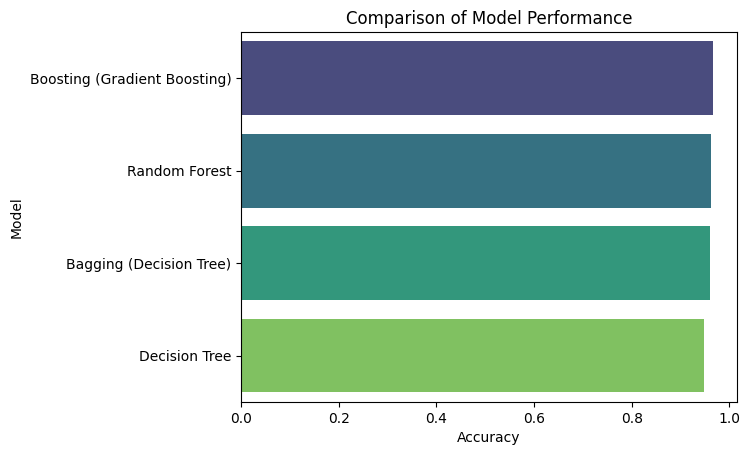

In [62]:
# Visualization of results
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Accuracy', y='Model', data=results, palette='viridis')
plt.title('Comparison of Model Performance')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()